<a href="https://colab.research.google.com/github/gabrielbarata/telegram-sorteio/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Chi-Square Distributions')

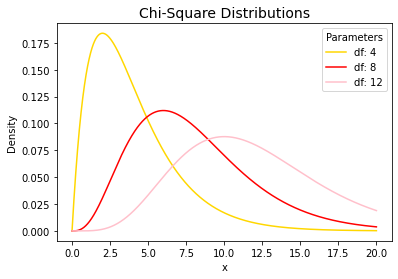

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), label='df: 4', color='gold')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8', color='red')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12', color='pink') 

#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)

In [ ]:
from scipy.stats import rv_discrete,rv_continuous
# class poisson_gen(rv_discrete):
#     "Poisson distribution"
#     def _pmf(self, k, mu):
#         return exp(-mu) * mu**k / factorial(k)


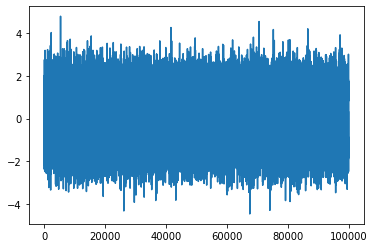

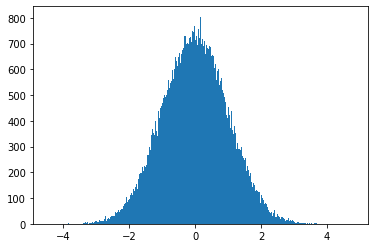

In [ ]:
x = np.arange(-5, 5, 0.0001)
y=norm.pdf(x)
y/=np.sum(y)
# x.shape,y.shape
# plt.plot(x,y)
a=np.random.choice(x,len(x),p=y)
plt.plot(a)
plt.show()
plt.hist(a,500)
plt.show()

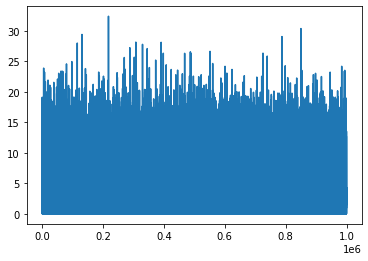

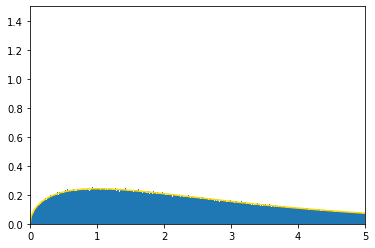

In [ ]:
x = np.arange(-5, 5, 0.00001)
x1 = np.arange(0, 5, 0.01)
y=norm.pdf(x)
y/=np.sum(y)
df=3
b=[np.random.choice(x,len(x),p=y)**2 for i in range(df)]
a=np.sum(b,axis=0)
# b=np.random.choice(x,len(x),p=y)**2
# a=b*df
plt.plot(a)
plt.show()
plt.plot(x1, chi2.pdf(x1, df=df), label=f'df:{df}', color='gold')
plt.hist(a,5000,density=True)
plt.xlim([0, 5])
plt.ylim([0, 1.5])
plt.show()

(array([1.17453559e+01, 4.92027769e+00, 3.73018868e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.19371247e-04]),
 array([3.58301683e-20, 4.55848255e-03, 9.11696510e-03, ...,
        2.27832958e+01, 2.27878543e+01, 2.27924127e+01]),
 <a list of 5000 Patch objects>)

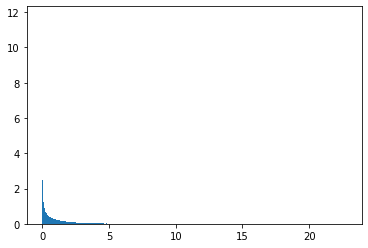

In [ ]:
plt.hist(b[0],5000,density=True)


(array([1.12883737e+01, 4.61018858e+00, 3.59771731e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.00251437e-04]),
 array([3.58301683e-20, 4.99372197e-03, 9.98744394e-03, ...,
        2.49586224e+01, 2.49636161e+01, 2.49686099e+01]),
 <a list of 5000 Patch objects>)

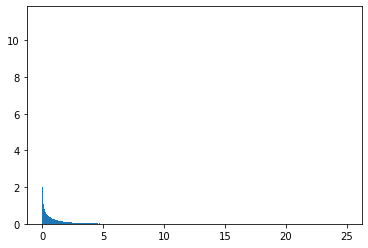

In [ ]:
plt.hist(b[1],5000,density=True)

In [ ]:
b[0]

array([8.25533570e+00, 1.58284622e-01, 2.50300092e-03, ...,
       5.97069224e-02, 4.73758755e-02, 1.91119565e+00])

(array([5.3086e+04, 2.2267e+04, 1.6843e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([3.58301683e-20, 4.45065933e-03, 8.90131867e-03, ...,
        2.22443954e+01, 2.22488460e+01, 2.22532967e+01]),
 <a list of 5000 Patch objects>)

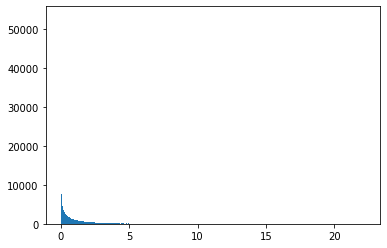

In [ ]:
plt.hist(a,5000)

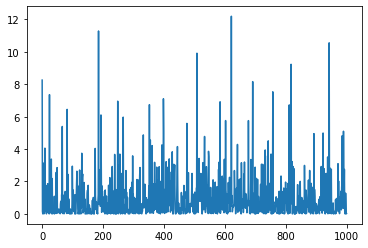

In [ ]:
plt.plot(a[:1000])
plt.show()

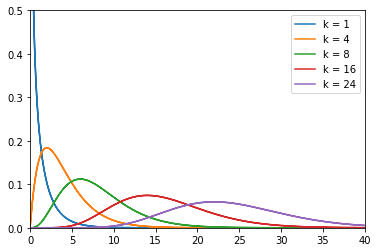

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

xs = np.arange(-10, 10, 0.001)
x2s = [x**2 for x in xs]

for k in [1, 4, 8, 16, 24]:
    plt.plot(x2s, chi2.pdf(x2s, k), label='k = {0}'.format(k))
    
plt.xlim(0, 40)
plt.ylim(0, 0.5)
plt.legend()
plt.show()

In [ ]:
','.join([1,2,3])

TypeError: ignored

In [ ]:
def é_par(a):
  if a==1:
    return False
  if a==2:
    return True
  if a==3:
    return False
  if a==4:
    return True

In [ ]:
with open('ver se é par.py','w') as file:
  string='def é_par(a):\n'
  for i in range(1,1000000):
    boolean = i%2==0
    string += f'''  if a == {i}:
    return {boolean}
'''
  file.write(string)
print(string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# show that we will reject the null hypothesis when the
# null hypothesis is true (false alarm) 5% of the time
num_tests = 10000
v=10000
results = np.zeros(num_tests)
for i in range(num_tests):
  x1 = np.random.randn(v)
  x2 = np.random.randn(v)
  z, p = ztest(x1, x2)
  results[i] = (p < 0.05)
print(results.mean())

0.0501
